In [1]:
import graph_tool.all as gt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter

from utils.WeightedCheckUtil import *

In [281]:
# To test gt.collection.ns_info output
# gt.collection.ns_info

In [2]:
gt.collection.ns_info['add_health']['tags']

['Social', 'Offline', 'Weighted']

In [3]:
def uncover_ns_analyses(cover_name: str, analyses: dict, names: list, tags: list) -> list[str]:
    result_list = []
    for name in names:
        info = analyses[name].copy()
        info['name'] = f'{cover_name}/{name}'
        info['tags'] = tags
        result_list.append(info)
    return result_list

In [4]:
def get_ns_graphs_info_list() -> list:
    list_of_dict = []
    for key, value in gt.collection.ns_info.items():
        if(len(value['nets']) == 1):
            info = value['analyses'].copy()
            info['name'] = key
            info['tags']=value['tags']
            list_of_dict.append(info)
        else:
            list_of_dict.extend(
                uncover_ns_analyses(
                    cover_name=key,
                    analyses=value['analyses'],
                    names=value['nets'],
                    tags=value['tags']
                )
            )
    return list_of_dict

In [5]:
def get_ns_dataset() -> list:
    list_of_dict = []
    for key, value in gt.collection.ns_info.items():
            info = value.copy()
            info.pop('analyses')
            info['name'] = key
            info['tags'] = value['tags']
            list_of_dict.append(info)
    return list_of_dict

In [6]:
tags_replacement = {
    "Politlcal": "Political",
    "Food Web": "Food web"
}

tags_to_remove = {"Spatial", "Uncertain"}

def fix_tags(tags):
    return [
        tags_replacement.get(tag, tag) 
        for tag in tags 
        if tag not in tags_to_remove
        ]

In [7]:
ns_graph_info_df = pd.DataFrame(get_ns_graphs_info_list())
ns_graph_info_df.head()

,average_degree,degree_assortativity,degree_std_dev,diameter,edge_properties,edge_reciprocity,global_clustering,hashimoto_radius,is_bipartite,is_directed,knn_proj_1,knn_proj_2,largest_component_fraction,mixing_time,num_edges,num_vertices,transition_gap,vertex_properties,name,tags
0,4.295775,0.165931,4.470805,6,"[[activities, int16_t]]",0.557377,0.423140,6.790672,False,True,4.008662,2.579694,0.971831,17.574715,305,71,0.944689,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm1,"[Social, Offline, Weighted]"
1,4.100917,0.245513,5.368580,7,"[[activities, int16_t]]",0.438479,0.376409,9.553534,False,True,3.962824,2.640243,0.944954,20.400986,447,109,0.952165,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm2,"[Social, Offline, Weighted]"
2,3.968750,0.343262,4.866579,5,"[[activities, int16_t]]",0.566929,0.489683,6.832615,False,True,4.025996,2.588898,1.000000,7.724657,127,32,0.878574,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm3,"[Social, Offline, Weighted]"
3,4.797251,0.131561,5.412265,7,"[[activities, int16_t]]",0.372493,0.245695,9.369079,False,True,4.003161,2.743150,0.965636,20.398415,1396,291,0.952159,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm4,"[Social, Offline, Weighted]"
4,5.943396,0.268051,5.549073,6,"[[activities, int16_t]]",0.455026,0.311322,10.612609,False,True,3.963441,2.659511,0.987421,9.900269,945,159,0.903926,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm5,"[Social, Offline, Weighted]"


In [8]:
ns_graph_info_df['tags'] = ns_graph_info_df['tags'].map(fix_tags)

In [9]:
ns_graph_info_df_short = ns_graph_info_df[~ns_graph_info_df['name'].str.startswith(('openstreetmap','human_brains'))]

In [10]:
print(f'Number of netwroks:{len(ns_graph_info_df)}')
print(f'Number of netwroks excluding openstreetmap, human_brains {len(ns_graph_info_df_short)}')

Number of netwroks:163735
Number of netwroks excluding openstreetmap, human_brains 6440


In [11]:
ns_graph_tag_count = ns_graph_info_df['tags'].explode().value_counts().sort_values(ascending=True)
ns_graph_tag_count

tags
Conflict                 1
Power grid               1
Drug interactions        1
Cryptocurrency           1
Academic graph           1
                     ...  
Biological           68373
Roads                91118
Transportation       91124
Multigraph           91759
Unweighted           93332
Name: count, Length: 61, dtype: int64

In [12]:
ns_graph_tag_count_short = ns_graph_info_df_short['tags'].explode().value_counts().sort_values(ascending=True)
ns_graph_tag_count_short

tags
Conflict                   1
Power grid                 1
Drug interactions          1
Cryptocurrency             1
Academic graph             1
                        ... 
Weighted                1875
Protein interactions    1911
Social                  2073
Biological              2118
Unweighted              2292
Name: count, Length: 61, dtype: int64

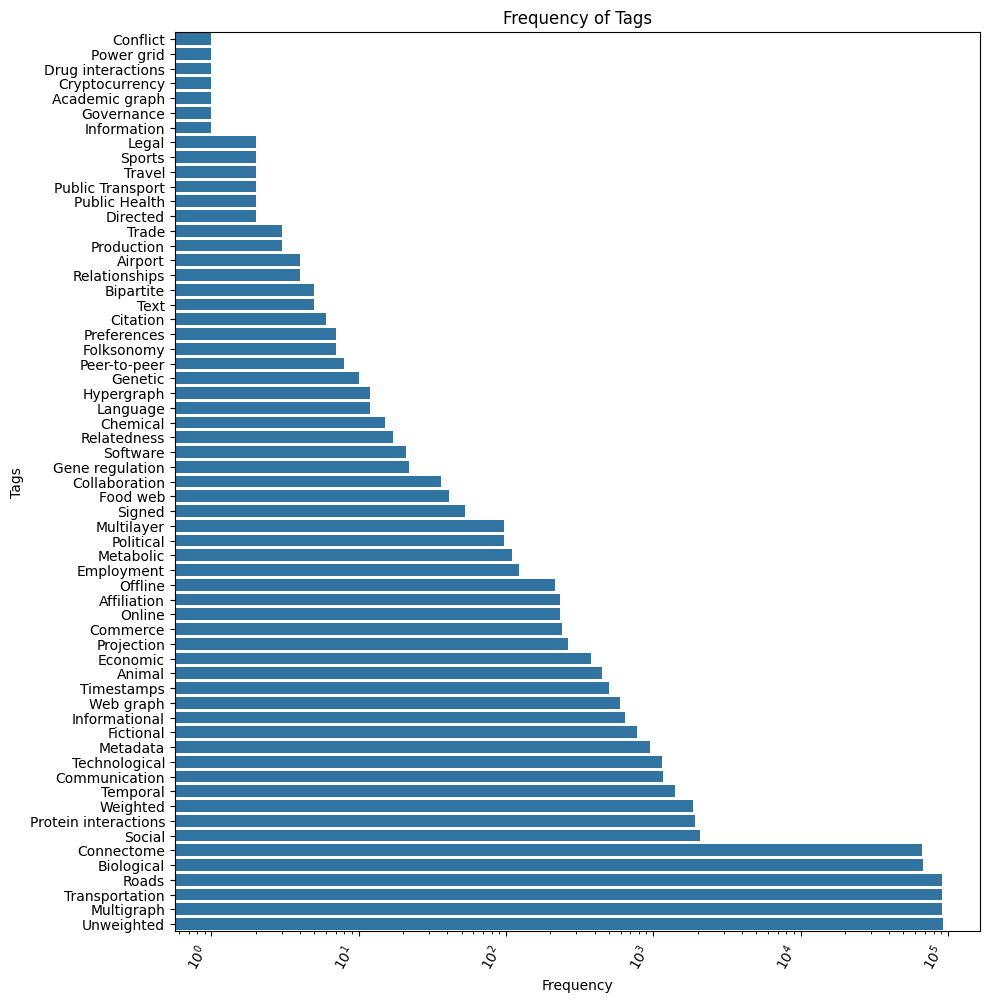

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(x=ns_graph_tag_count.values, y=ns_graph_tag_count.index, errorbar=None,  orient="h")
plt.title("Frequency of Tags")
plt.xlabel("Frequency")
plt.xscale('log')
plt.ylabel("Tags")
plt.tight_layout()

plt.xticks(rotation=60, ha='right')

plt.show()

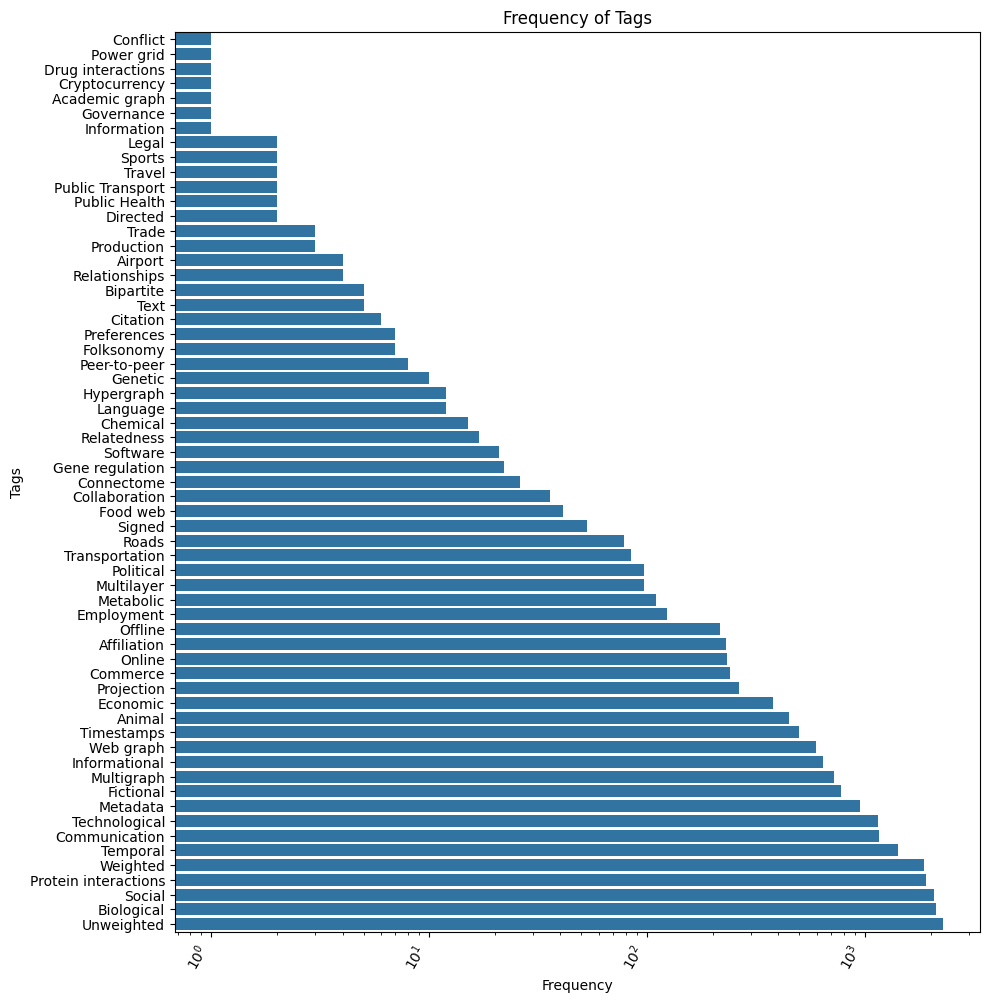

In [14]:
plt.figure(figsize=(10, 10))
sns.barplot(x=ns_graph_tag_count_short.values, y=ns_graph_tag_count_short.index, errorbar=None,  orient="h")
plt.title("Frequency of Tags")
plt.xlabel("Frequency")
plt.xscale('log')
plt.ylabel("Tags")
plt.tight_layout()

plt.xticks(rotation=60, ha='right')

plt.show()

In [15]:
ns_graph_tag_count.index

Index(['Conflict', 'Power grid', 'Drug interactions', 'Cryptocurrency',
       'Academic graph', 'Governance', 'Information', 'Legal', 'Sports',
       'Travel', 'Public Transport', 'Public Health', 'Directed', 'Trade',
       'Production', 'Airport', 'Relationships', 'Bipartite', 'Text',
       'Citation', 'Preferences', 'Folksonomy', 'Peer-to-peer', 'Genetic',
       'Hypergraph', 'Language', 'Chemical', 'Relatedness', 'Software',
       'Gene regulation', 'Collaboration', 'Food web', 'Signed', 'Multilayer',
       'Political', 'Metabolic', 'Employment', 'Offline', 'Affiliation',
       'Online', 'Commerce', 'Projection', 'Economic', 'Animal', 'Timestamps',
       'Web graph', 'Informational', 'Fictional', 'Metadata', 'Technological',
       'Communication', 'Temporal', 'Weighted', 'Protein interactions',
       'Social', 'Connectome', 'Biological', 'Roads', 'Transportation',
       'Multigraph', 'Unweighted'],
      dtype='object', name='tags')

In [16]:
def count_weighted(df):
    count_both_true = 0
    count_unknown = 0
    count_unweighted = 0
    count_weighted = 0
    for _, entity in ns_graph_info_df.iterrows():
        weighted = is_weighted(entity)
        if weighted == GraphWeighting.UNKNOWN:
            count_unknown += 1
        elif weighted == GraphWeighting.BOTH :
            count_both_true += 1
        elif weighted == GraphWeighting.UNWEIGHTED:
            count_unweighted += 1
        elif weighted == GraphWeighting.WEIGHTED:
            count_weighted += 1
    print(f"Both_true: {count_both_true}", 
          f"Unknown: {count_unknown}", 
          f"Unweighted: {count_unweighted}", 
          f"Weighted: {count_weighted}", sep='\n')

In [17]:
count_weighted(ns_graph_info_df)

Both_true: 29
Unknown: 68557
Unweighted: 93303
Weighted: 1846


In [18]:
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

In [19]:
ns_graph_directed_count = ns_graph_info_df['is_directed'].value_counts()
ns_graph_bipartite_count = ns_graph_info_df['is_bipartite'].value_counts()

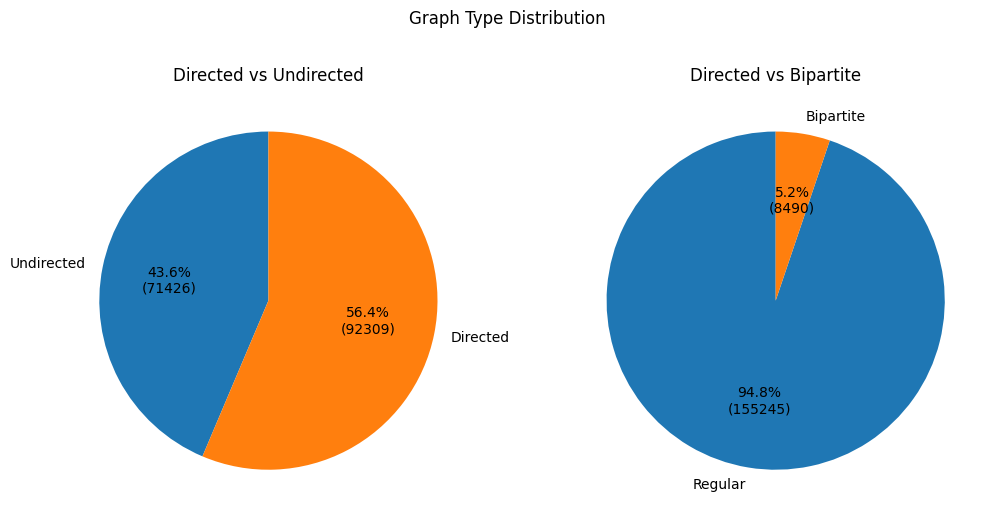

<Figure size 700x700 with 0 Axes>

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.figure(figsize=(7, 7))

axes[0].pie(
    ns_graph_directed_count.sort_index(),
    labels=['Undirected', 'Directed'],
    autopct= lambda pct: autopct_format(pct, ns_graph_directed_count),
    startangle=90
)
axes[0].set_title('Directed vs Undirected')


axes[1].pie(
    ns_graph_bipartite_count.sort_index(),
    labels=['Regular', 'Bipartite'],
    autopct= lambda pct: autopct_format(pct, ns_graph_bipartite_count),
    startangle=90
)
axes[1].set_title('Directed vs Bipartite')


fig.suptitle("Graph Type Distribution")

plt.show()

In [21]:
g = gt.collection.ns["human/comm36"]


KeyError: 'HTTP Error 404: NOT FOUND'

In [22]:
def ns_dataset_filter(by: GraphWeighting, input):
    result_list = []

    for key, value in input:
        if is_weighted(value) == by:
            result_list.append(key)
    return result_list

In [23]:
ns_graph_info_df_weighting = ns_graph_info_df.copy()

In [24]:
ns_graph_info_df_weighting["is_weighted"] = ns_graph_info_df_weighting.apply(is_weighted, axis = 1)

In [25]:
ns_graph_info_df_weighting.head()

,average_degree,degree_assortativity,degree_std_dev,diameter,edge_properties,edge_reciprocity,global_clustering,hashimoto_radius,is_bipartite,is_directed,...,knn_proj_2,largest_component_fraction,mixing_time,num_edges,num_vertices,transition_gap,vertex_properties,name,tags,is_weighted
0,4.295775,0.165931,4.470805,6,"[[activities, int16_t]]",0.557377,0.423140,6.790672,False,True,...,2.579694,0.971831,17.574715,305,71,0.944689,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm1,"[Social, Offline, Weighted]",GraphWeighting.WEIGHTED
1,4.100917,0.245513,5.368580,7,"[[activities, int16_t]]",0.438479,0.376409,9.553534,False,True,...,2.640243,0.944954,20.400986,447,109,0.952165,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm2,"[Social, Offline, Weighted]",GraphWeighting.WEIGHTED
2,3.968750,0.343262,4.866579,5,"[[activities, int16_t]]",0.566929,0.489683,6.832615,False,True,...,2.588898,1.000000,7.724657,127,32,0.878574,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm3,"[Social, Offline, Weighted]",GraphWeighting.WEIGHTED
3,4.797251,0.131561,5.412265,7,"[[activities, int16_t]]",0.372493,0.245695,9.369079,False,True,...,2.743150,0.965636,20.398415,1396,291,0.952159,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm4,"[Social, Offline, Weighted]",GraphWeighting.WEIGHTED
4,5.943396,0.268051,5.549073,6,"[[activities, int16_t]]",0.455026,0.311322,10.612609,False,True,...,2.659511,0.987421,9.900269,945,159,0.903926,"[[sex, int16_t], [race, int16_t], [grade, int1...",add_health/comm5,"[Social, Offline, Weighted]",GraphWeighting.WEIGHTED


In [26]:
print("All datasets with Uknown weight:")
ns_dataset_filter(by = GraphWeighting.UNKNOWN, input = gt.collection.ns_info.items())

All datasets with Uknown weight:


['chess',
 'digg_votes',
 'edit_wikibooks',
 'edit_wikinews',
 'edit_wikiquote',
 'edit_wiktionary',
 'elec',
 'facebook_wall',
 'fediverse',
 'human_brains',
 'new_guinea_tribes',
 'pokec',
 'slashdot_zoo',
 'social_location',
 'tree-of-life',
 'us_congress',
 'wiki_rfa',
 'wiki_users',
 'wikiconflict']

In [27]:
print("All datasets with Both weight types:")
ns_dataset_filter(by = GraphWeighting.BOTH, input = gt.collection.ns_info.items())

All datasets with Both weight types:


['bookcrossing',
 'copenhagen',
 'dblp_simplices',
 'mag_geology_coauthor',
 'mag_history_coauthor',
 'sp_baboons',
 'sp_colocation',
 'sp_high_school']

In [28]:
g = gt.collection.ns["sp_high_school"]
g_edge_iter = g.edges()

KeyError: 'HTTP Error 404: NOT FOUND'

In [29]:
# for idx, edge in enumerate(g_edge_iter):
#     if(idx>25):
#         break
#     print(g.edge_properties['time'][edge])

In [30]:
manual_weighting_dict = {
    "chess": GraphWeighting.UNWEIGHTED,
    "digg_votes": GraphWeighting.UNWEIGHTED,
    "edit_wikibooks": GraphWeighting.UNWEIGHTED,  # ?????
    "edit_wikinews": GraphWeighting.UNWEIGHTED,  # ????
    "edit_wikiquote": GraphWeighting.UNWEIGHTED,  # ????
    "edit_wiktionary": GraphWeighting.UNWEIGHTED,  # ????
    "elec": GraphWeighting.UNWEIGHTED,
    "facebook_wall": GraphWeighting.UNWEIGHTED,
    "fediverse": GraphWeighting.UNWEIGHTED,
    "human_brains": GraphWeighting.WEIGHTED,
    "new_guinea_tribes": GraphWeighting.UNWEIGHTED,
    "pokec": GraphWeighting.UNWEIGHTED,
    "slashdot_zoo": GraphWeighting.UNWEIGHTED,
    "social_location": GraphWeighting.UNWEIGHTED,
    "tree-of-life" : GraphWeighting.UNWEIGHTED,
    "us_congress" : GraphWeighting.UNWEIGHTED,
    "wiki_rfa" : GraphWeighting.UNWEIGHTED,
    "wiki_users" : GraphWeighting.UNWEIGHTED,
    "wikiconflict" : GraphWeighting.WEIGHTED,
    "bookcrossing" : GraphWeighting.UNWEIGHTED,
    "copenhagen/sms" : GraphWeighting.UNWEIGHTED,
    "copenhagen/fb_friends" : GraphWeighting.UNWEIGHTED,
    "copenhagen/calls" : GraphWeighting.WEIGHTED,
    "copenhagen/bt" : GraphWeighting.UNWEIGHTED, # ?????
    "dblp_simplices/full-proj" : GraphWeighting.WEIGHTED, #????
    "dblp_simplices/full-bip" : GraphWeighting.UNWEIGHTED,
    "dblp_simplices/max-25-bip" : GraphWeighting.UNWEIGHTED,
    "dblp_simplices/max-25-proj" : GraphWeighting.WEIGHTED, # ??????
    "mag_geology_coauthor/full-proj" : GraphWeighting.WEIGHTED, #????
    "mag_geology_coauthor/full-bip" : GraphWeighting.UNWEIGHTED,
    "mag_geology_coauthor/max-25-bip" : GraphWeighting.UNWEIGHTED,
    "mag_geology_coauthor/max-25-proj" : GraphWeighting.WEIGHTED, #????
    "mag_history_coauthor/full-proj" : GraphWeighting.WEIGHTED, #????
    "mag_history_coauthor/full-bip" : GraphWeighting.UNWEIGHTED,
    "mag_history_coauthor/max-25-bip" : GraphWeighting.UNWEIGHTED,
    "mag_history_coauthor/max-25-proj" : GraphWeighting.WEIGHTED, #????
    "sp_baboons/observational" : GraphWeighting.WEIGHTED,
    "sp_baboons/sensor" : GraphWeighting.UNWEIGHTED,
    "sp_colocation" : GraphWeighting.UNWEIGHTED,
    "sp_high_school/survey" : GraphWeighting.UNWEIGHTED,
    "sp_high_school/facebook" : GraphWeighting.UNWEIGHTED,
    "sp_high_school/proximity" : GraphWeighting.WEIGHTED,
    "sp_high_school/survey" : GraphWeighting.UNWEIGHTED,
}

In [31]:
technical_tags = [
    'Bipartite',
    'Directed',
    'Metadata',
    'Multigraph',
    'Multilayer',
    'Projection',
    'Signed',
    'Temporal',
    'Timestamps',
    'Unweighted',
    'Weighted'
]

In [32]:
categorical_tags = np.setdiff1d(ns_graph_tag_count.index.tolist(), technical_tags).tolist()
len(categorical_tags)

50

In [33]:
ns_graph_info_df_big_1000 = ns_graph_info_df[ns_graph_info_df['num_vertices'] > 1000]

In [34]:
print(f"Number of graphs with more than 1000 vertices: {len(ns_graph_info_df_big_1000)}")
print(f"Percentage of graphs with more than 1000 vertices: {len(ns_graph_info_df_big_1000)/len(ns_graph_info_df)*100}%")

Number of graphs with more than 1000 vertices: 34226
Percentage of graphs with more than 1000 vertices: 20.9032888508871%


In [35]:
# Move this plot util functions to a separate file

from collections.abc import Iterable

def plot_beauty(plt, axes, all = False):
    if isinstance(axes, Iterable):
        for ax in axes:
            beauty_ax(ax, all)
    else:
         beauty_ax(axes, all)
    plt.show()

def beauty_ax(ax, all = False):
    if all:
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False)

def plot_no_axes(plt):
    plt.axis('off')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


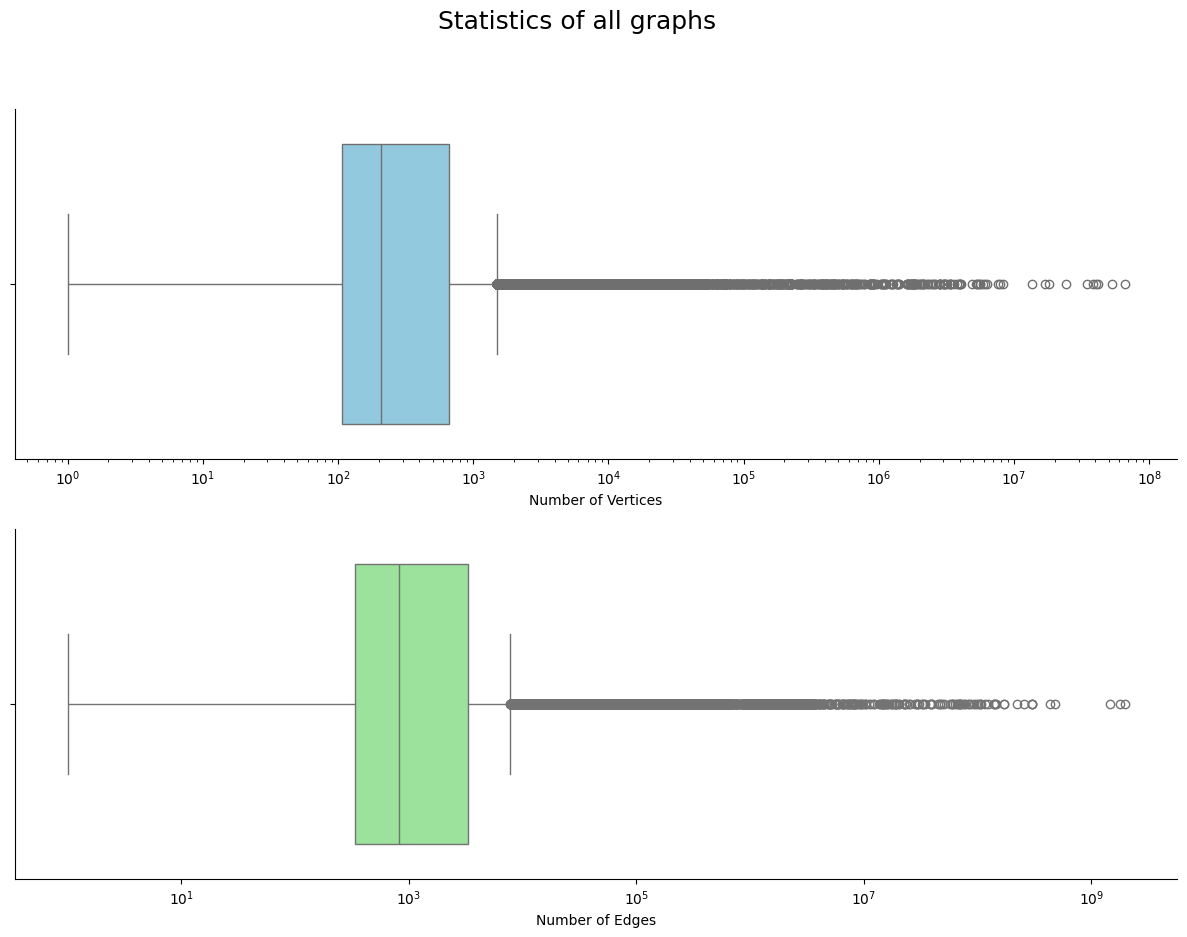

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle("Statistics of all graphs", fontsize=18)

# Boxplot for number of vertices
sns.boxplot(x=ns_graph_info_df['num_vertices'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Vertices')
axes[0].set_xscale('log')

# Boxplot for number of edges
sns.boxplot(x=ns_graph_info_df['num_edges'], ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Edges')
axes[1].set_xscale('log')

plot_beauty(plt, axes)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


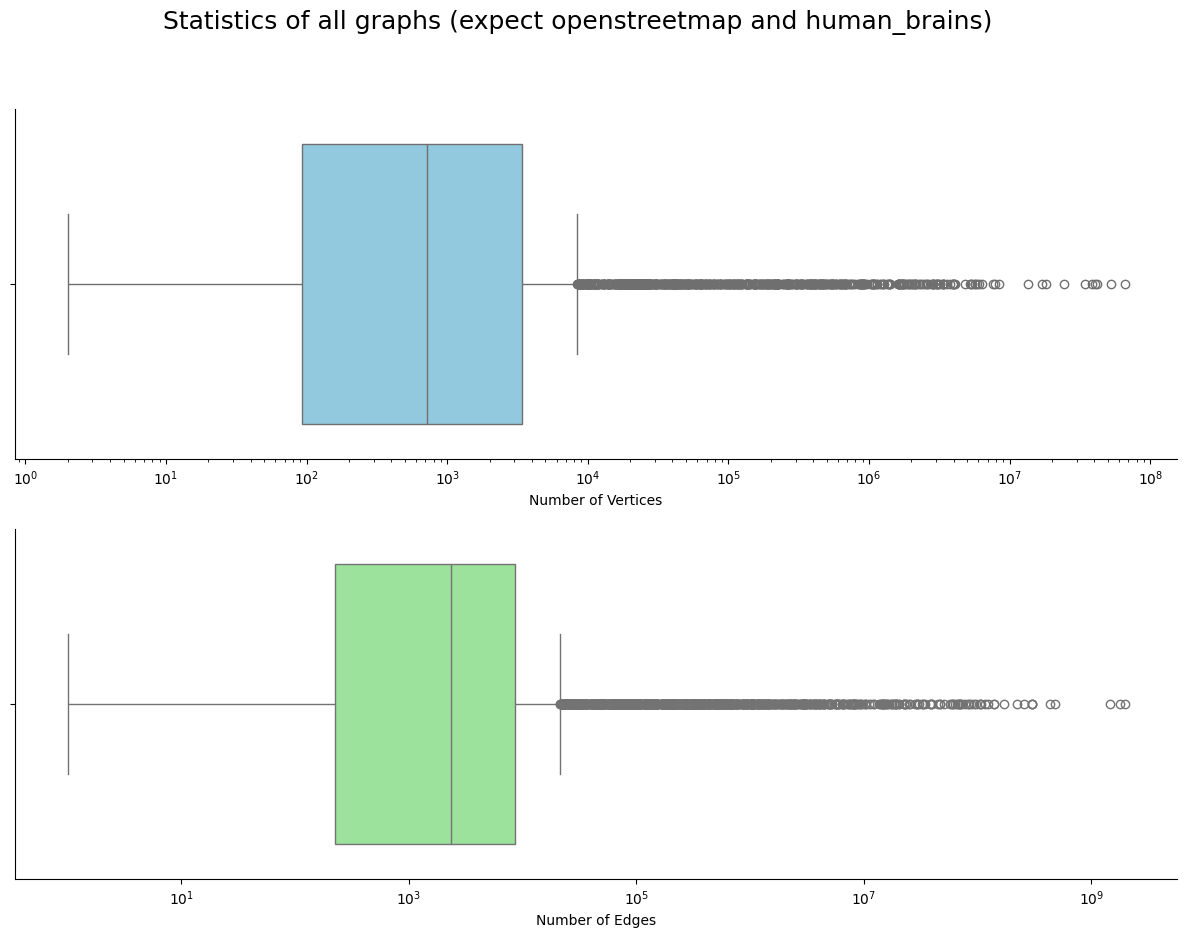

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle("Statistics of all graphs (expect openstreetmap and human_brains)", fontsize=18)

# Boxplot for number of vertices
sns.boxplot(x=ns_graph_info_df_short['num_vertices'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Vertices')
axes[0].set_xscale('log')

# Boxplot for number of edges
sns.boxplot(x=ns_graph_info_df_short['num_edges'], ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Edges')
axes[1].set_xscale('log')

plot_beauty(plt, axes)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


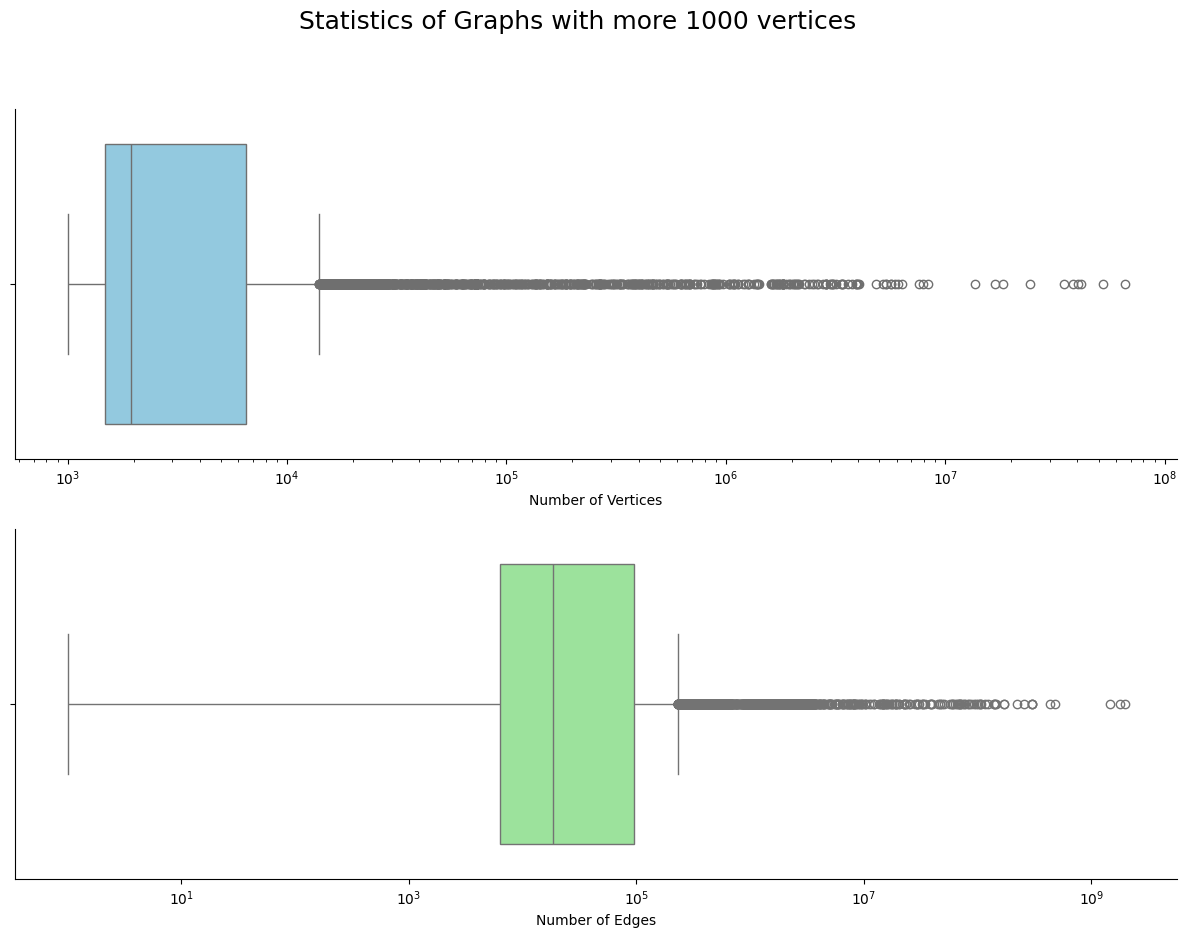

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle("Statistics of Graphs with more 1000 vertices", fontsize=18)

# Boxplot for number of vertices
sns.boxplot(x=ns_graph_info_df_big_1000['num_vertices'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Vertices')
axes[0].set_xscale('log')

# Boxplot for number of edges
sns.boxplot(x=ns_graph_info_df_big_1000['num_edges'], ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Edges')
axes[1].set_xscale('log')

plot_beauty(plt, axes)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


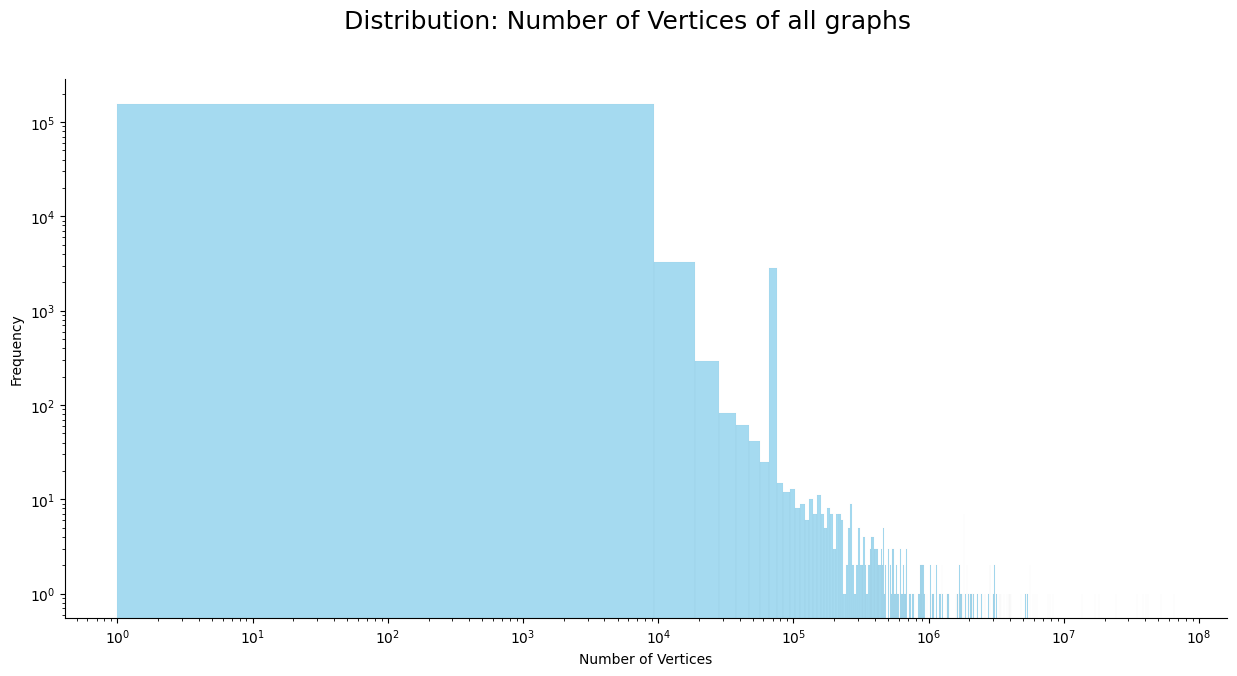

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Distribution: Number of Vertices of all graphs", fontsize=18)

# Histogram for number of vertices
sns.histplot(ns_graph_info_df['num_vertices'], ax=ax, color='skyblue', bins=7000)
ax.set_xlabel('Number of Vertices')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.set_xscale('log')

plot_beauty(plt, ax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


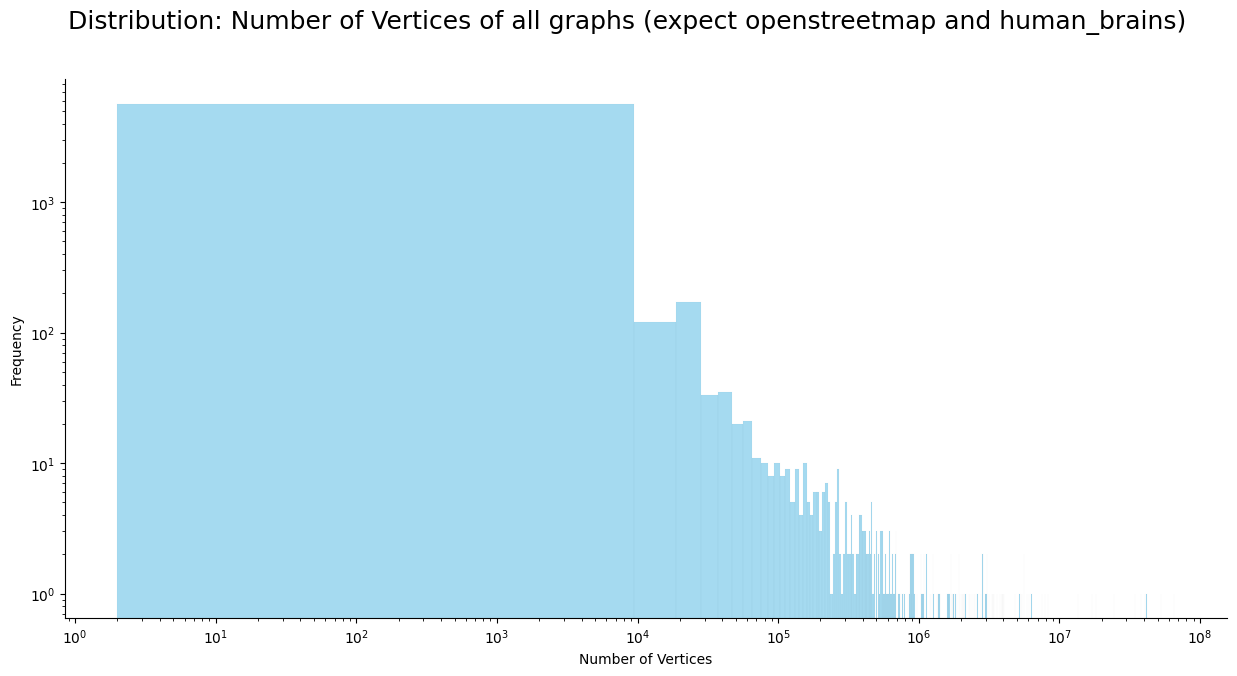

In [40]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Distribution: Number of Vertices of all graphs (expect openstreetmap and human_brains)", fontsize=18)

# Histogram for number of vertices
sns.histplot(ns_graph_info_df_short['num_vertices'], ax=ax, color='skyblue', bins=7000)
ax.set_xlabel('Number of Vertices')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.set_xscale('log')

plot_beauty(plt, ax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


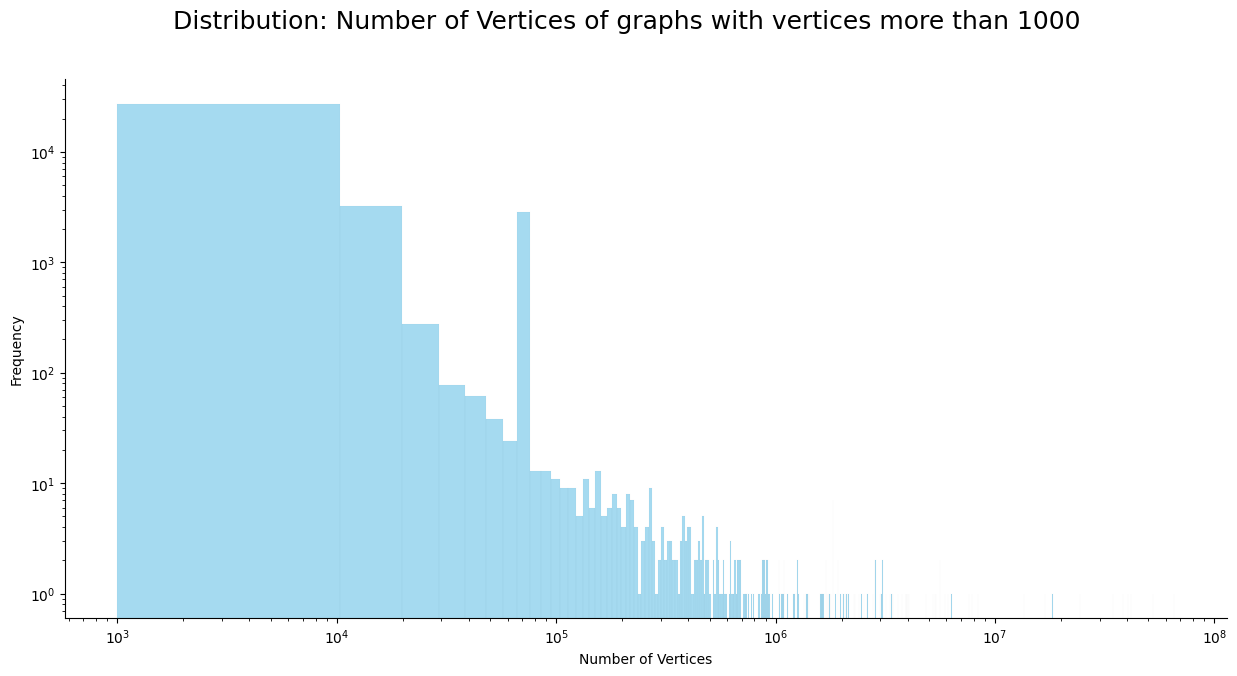

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Distribution: Number of Vertices of graphs with vertices more than 1000", fontsize=18)

# Histogram for number of vertices
sns.histplot(ns_graph_info_df_big_1000['num_vertices'], ax=ax, color='skyblue', bins=7000)
ax.set_xlabel('Number of Vertices')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.set_xscale('log')

plot_beauty(plt, ax)

# Analyze tags in the All Graphs

In [96]:
edges_to_remove = {
    'Biological' : 'Food web',
    'Technological' : 'Power grid'
}

In [42]:
def plot_tag_pie_chart(df, filter = None, title = 'Tag Distribution', pct = '%1.1f%%', label_filter = None):

    fig, ax = plt.subplots(figsize=(10, 10))

    # Flatten the list of lists of tags into a single list
    if(filter == None):
        all_tags = [tag for tag_list in df['tags'] for tag in tag_list]
    else:
        all_tags = [tag for tag_list in df['tags'] for tag in tag_list if filter(tag)]

    # Count the occurrences of each tag
    tag_counts = pd.Series(all_tags).value_counts()

    percentages = tag_counts / tag_counts.sum() * 100

    # Create the pie chart
    _, texts, _  = ax.pie(tag_counts,labels=tag_counts.index, autopct=pct, startangle=90, pctdistance=0.8)

    # Filters labes based on provided filter function
    if label_filter != None:
        for i, pct in enumerate(percentages):
            if label_filter(pct):
                texts[i].set_visible(True) 
            else:
                texts[i].set_visible(False) 

    ax.legend(labels = tag_counts.index, loc='best', bbox_to_anchor=(1, 0.5))
    fig.suptitle(title)
    plt.show()

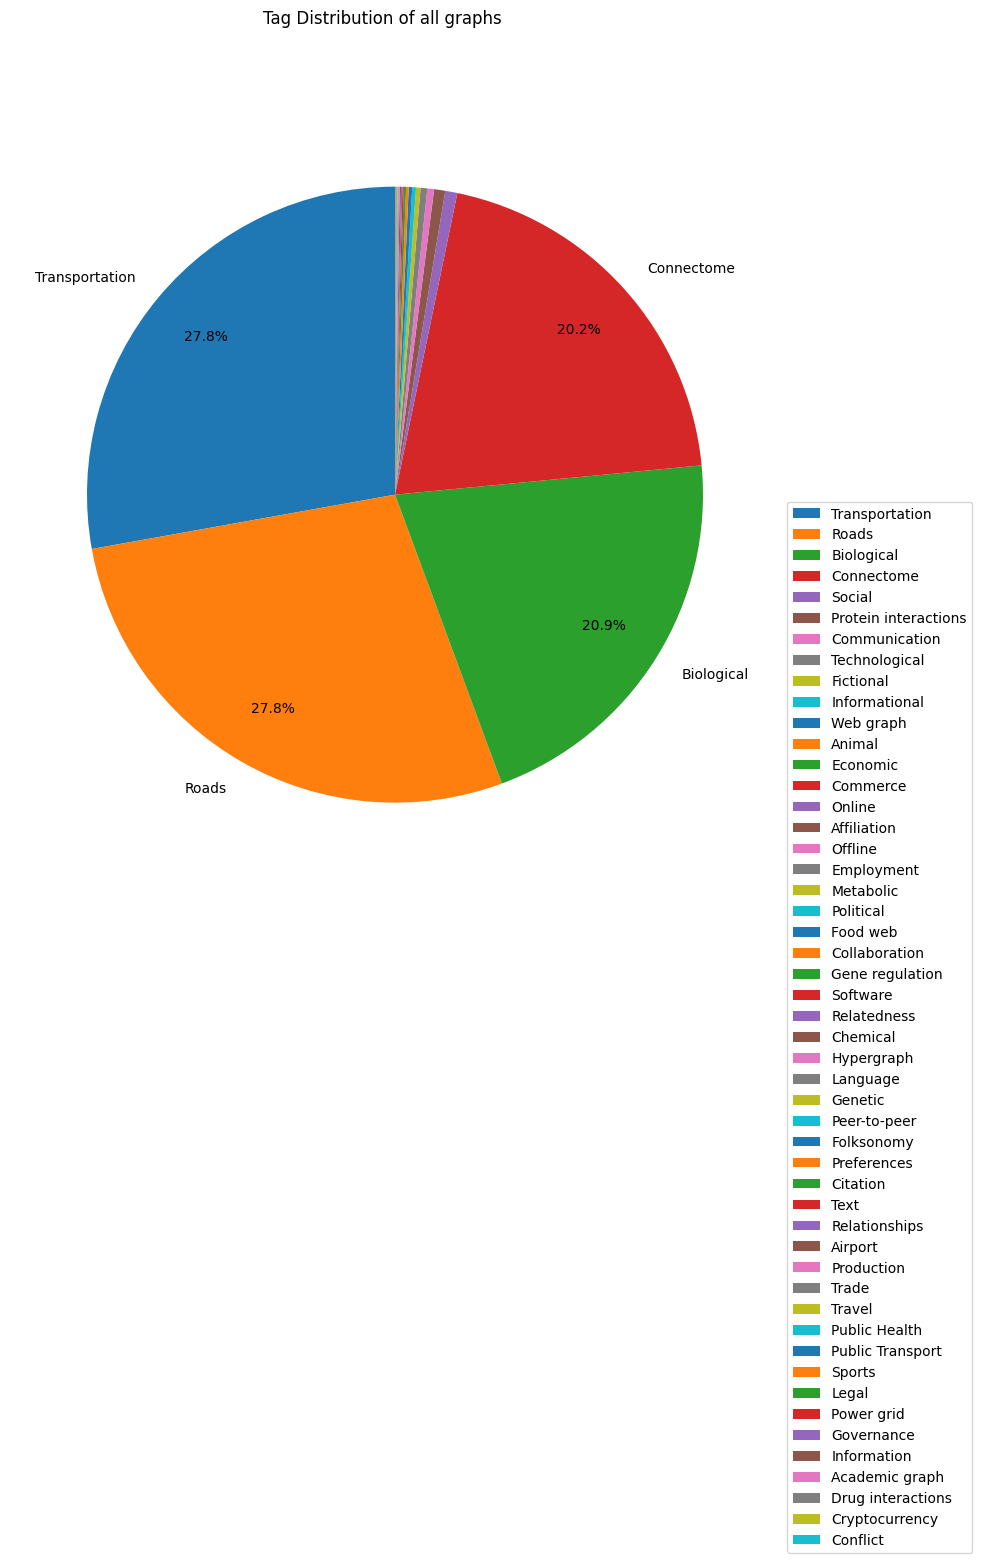

In [43]:
plot_tag_pie_chart(
    ns_graph_info_df,
    title='Tag Distribution of all graphs',
    filter = lambda tag: tag in categorical_tags, 
    pct = lambda pct: f'{pct:.1f}%' if pct > 1 else '',
    label_filter = lambda pct: pct > 1
    )

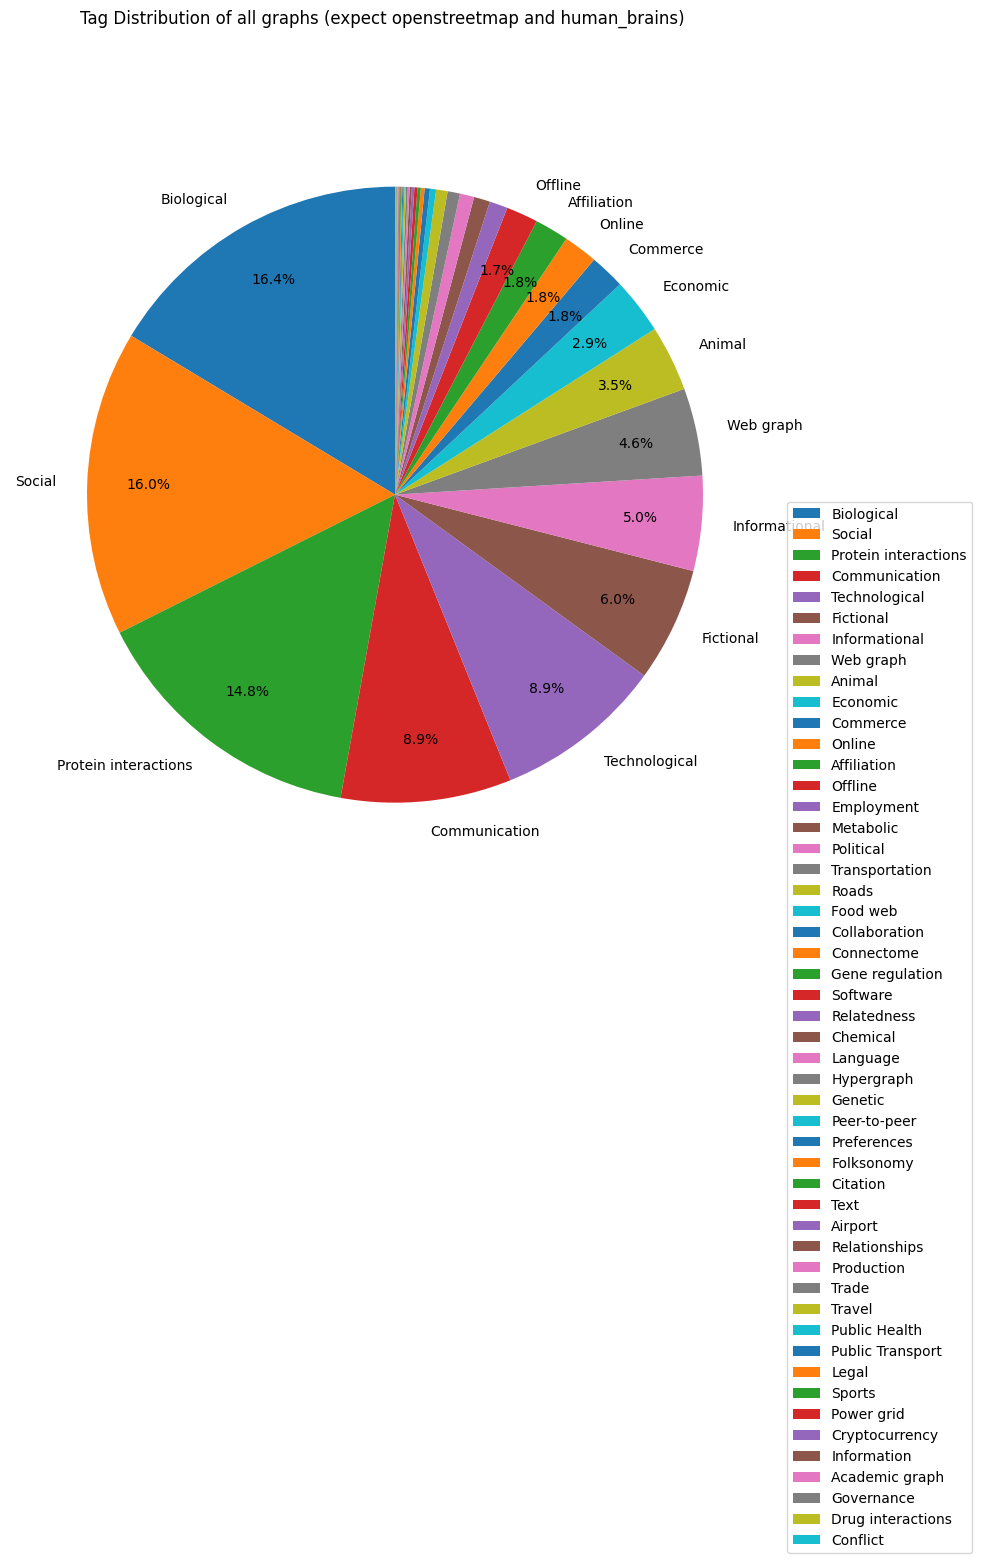

In [44]:
plot_tag_pie_chart(
    ns_graph_info_df_short, 
    title='Tag Distribution of all graphs (expect openstreetmap and human_brains)',
    filter = lambda tag: tag in categorical_tags, 
    pct = lambda pct: f'{pct:.1f}%' if pct > 1 else '',
    label_filter = lambda pct: pct > 1
    )

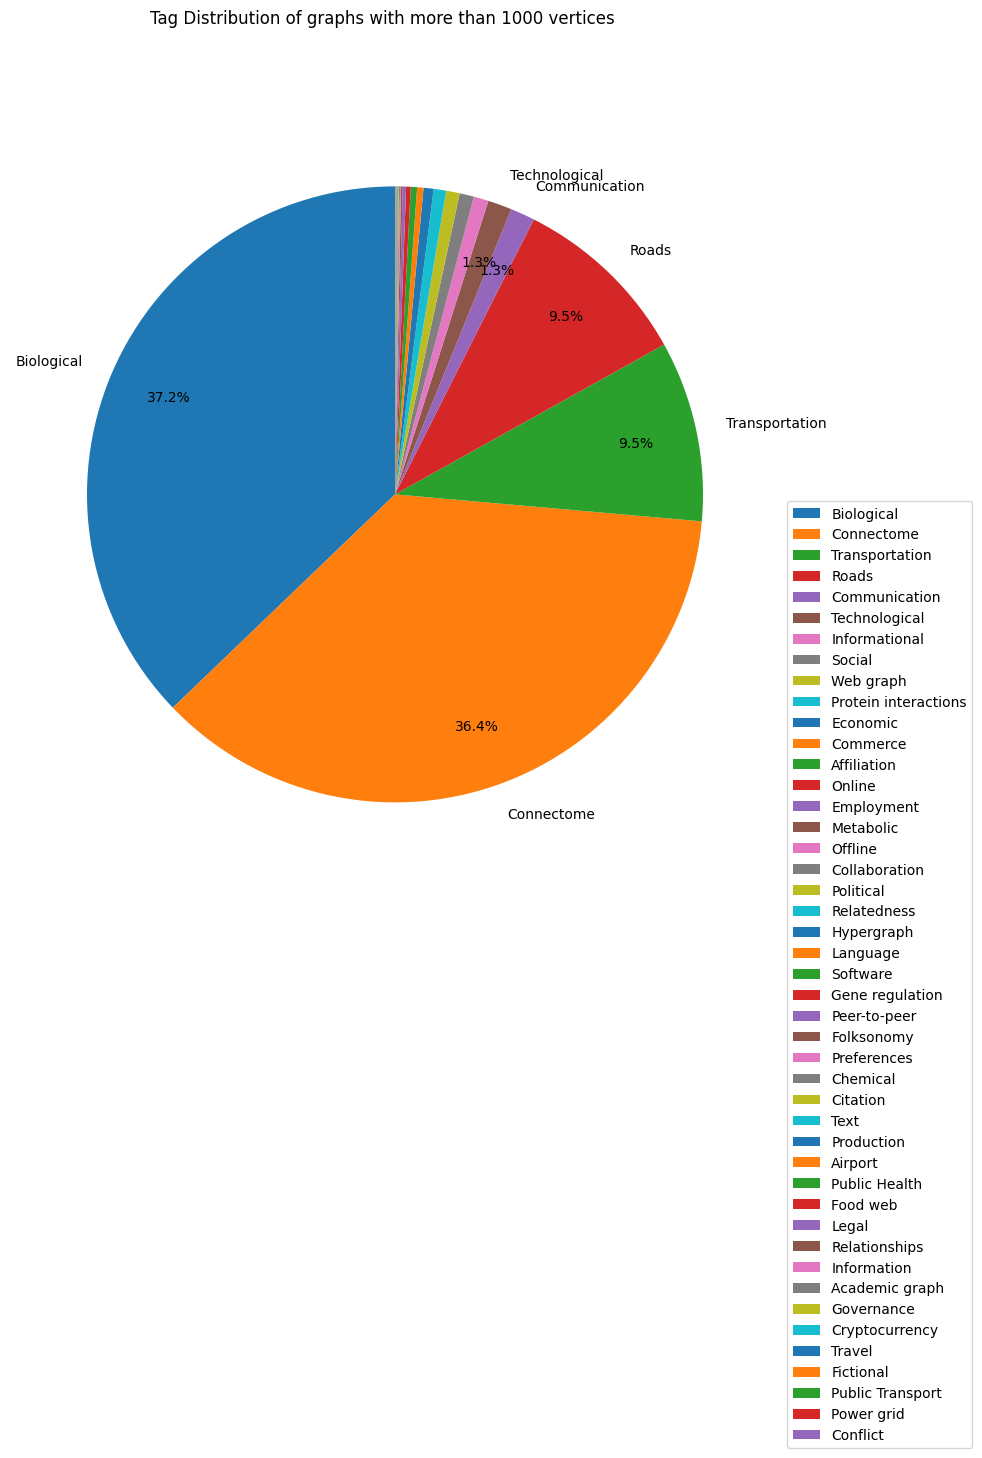

In [45]:
plot_tag_pie_chart(
    ns_graph_info_df_big_1000, 
    title='Tag Distribution of graphs with more than 1000 vertices',
    filter = lambda tag: tag in categorical_tags, 
    pct = lambda pct: f'{pct:.1f}%' if pct > 1 else '',
    label_filter = lambda pct: pct > 1
    )

In [46]:
# Function for building a weighted tag graph
def build_tag_graph(df, column_name='tags', tag_filter=None):

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return None

    tag_pairs = []
    for tags in df[column_name]:

        for i in range(len(tags)):
            for j in range(i + 1, len(tags)):
                if(tag_filter == None):
                    tag_pairs.append(tuple(sorted((tags[i], tags[j]))))
                else:
                    if tag_filter(tags[i]) and tag_filter(tags[j]):
                        tag_pairs.append(tuple(sorted((tags[i], tags[j]))))

    tag_counts = Counter(tag_pairs)

    graph = nx.Graph()

    for (tag1, tag2), weight in tag_counts.items():
        graph.add_edge(tag1, tag2, weight=weight)

    return graph

In [47]:
# Function for building a weighted tag graph
def build_bipartite_tag_graph(df, column_name='tags', tag_filter=None):

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return None

    all_tags = set()
    tag_pairs = []
    for tags in df[column_name]:
        # updating set of tags
        all_tags.update(tags)

        for i in range(len(tags)):
            for j in range(i + 1, len(tags)):
                if(tag_filter == None):
                    tag_pairs.append(tuple(sorted((tags[i], tags[j]))))
                else:
                    if tag_filter(tags[i]) and tag_filter(tags[j]):
                        tag_pairs.append(tuple(sorted((tags[i], tags[j]))))

    tag_counts = Counter(tag_pairs)

    graph = nx.Graph()
    graph.add_nodes_from(list(all_tags), bipartite=0)
    graph.add_nodes_from(df['name'].to_list(), bipartite=1)

    for (tag1, tag2), weight in tag_counts.items():
        graph.add_edge(tag1, tag2, weight=weight)

    return graph

In [48]:
test_bipartite = build_bipartite_tag_graph(
    ns_graph_info_df, 
    tag_filter=lambda tag: tag in categorical_tags
    )

In [49]:
# a , _ = nx.bipartite.sets(test_bipartite)
# a

In [50]:
ns_categorical_tags_graph = build_tag_graph(
    ns_graph_info_df, 
    tag_filter=lambda tag: tag in categorical_tags
    )

In [51]:
ns_categorical_tags_graph_short = build_tag_graph(
    ns_graph_info_df_short,
    tag_filter=lambda tag: tag in categorical_tags
    )

In [52]:
ns_categorical_tags_graph_big_1000 = build_tag_graph(
    ns_graph_info_df_big_1000,
    tag_filter=lambda tag: tag in categorical_tags
)

In [108]:
# deleting illogical edges (connection from the graphs)

for key, value in edges_to_remove.items():
    ns_categorical_tags_graph.remove_edge(key, value)
    ns_categorical_tags_graph_short.remove_edge(key, value)
    ns_categorical_tags_graph_big_1000.remove_edge(key, value)

In [53]:
def draw_weighted_graph(G, layout_function = nx.spring_layout):
    plt.figure(figsize=(10, 10))

    pos = layout_function(G)

    weight_labels = nx.get_edge_attributes(G,'weight')

    plt.figure(figsize=(12, 12))

    nx.draw(G, pos,
            with_labels=True,
        font_size = 6,
        node_size=50, 
        edge_color='gray', 
        alpha=0.7)

    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels, font_size=6, alpha=0.6)

In [54]:
# draw_weighted_graph(ns_categorical_tags_graph, layout_function=nx.circular_layout)

In [124]:
def draw_graph_with_communities(graph, partition):
    
    node_community_map = {}
    for community_index, community in enumerate(partition):
        for node in community:
            node_community_map[node] = community_index

    num_communities = len(partition)
    colors = plt.cm.tab20(range(num_communities))

    # Assigning colors to nodes based on their community
    node_colors = [colors[node_community_map[node]] for node in graph.nodes]


    # Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph, k=0.4, scale=1.5)

    nx.draw(
        graph, 
        pos, 
        node_color=node_colors, 
        with_labels=True,
        font_size = 6,
        node_size=50, 
        edge_color='gray', 
        alpha=0.7
    )

    weight_labels = nx.get_edge_attributes(graph,'weight')

    nx.draw_networkx_edge_labels(graph,pos,edge_labels=weight_labels, font_size=6, alpha=0.6)

    plt.title("Graph with Louvain Communities")
    plt.axis('off')
    plt.show()

In [109]:
big_1000_communities = nx.community.louvain_communities(ns_categorical_tags_graph_big_1000, weight='weight', resolution=3.0)

In [111]:
short_graphs_communities = nx.community.louvain_communities(ns_categorical_tags_graph_short, weight='weight')

In [59]:
# draw_graph_with_communities(ns_categorical_tags_graph_big_1000, big_1000_communities)
# draw_graph_with_communities(ns_categorical_tags_graph_short, short_graphs_communities)

In [178]:
all_graphs_communities_2 = nx.community.louvain_communities(ns_categorical_tags_graph, weight='weight', resolution=2.0)
all_graphs_communities_3 = nx.community.louvain_communities(ns_categorical_tags_graph, weight='weight', resolution=3.0)

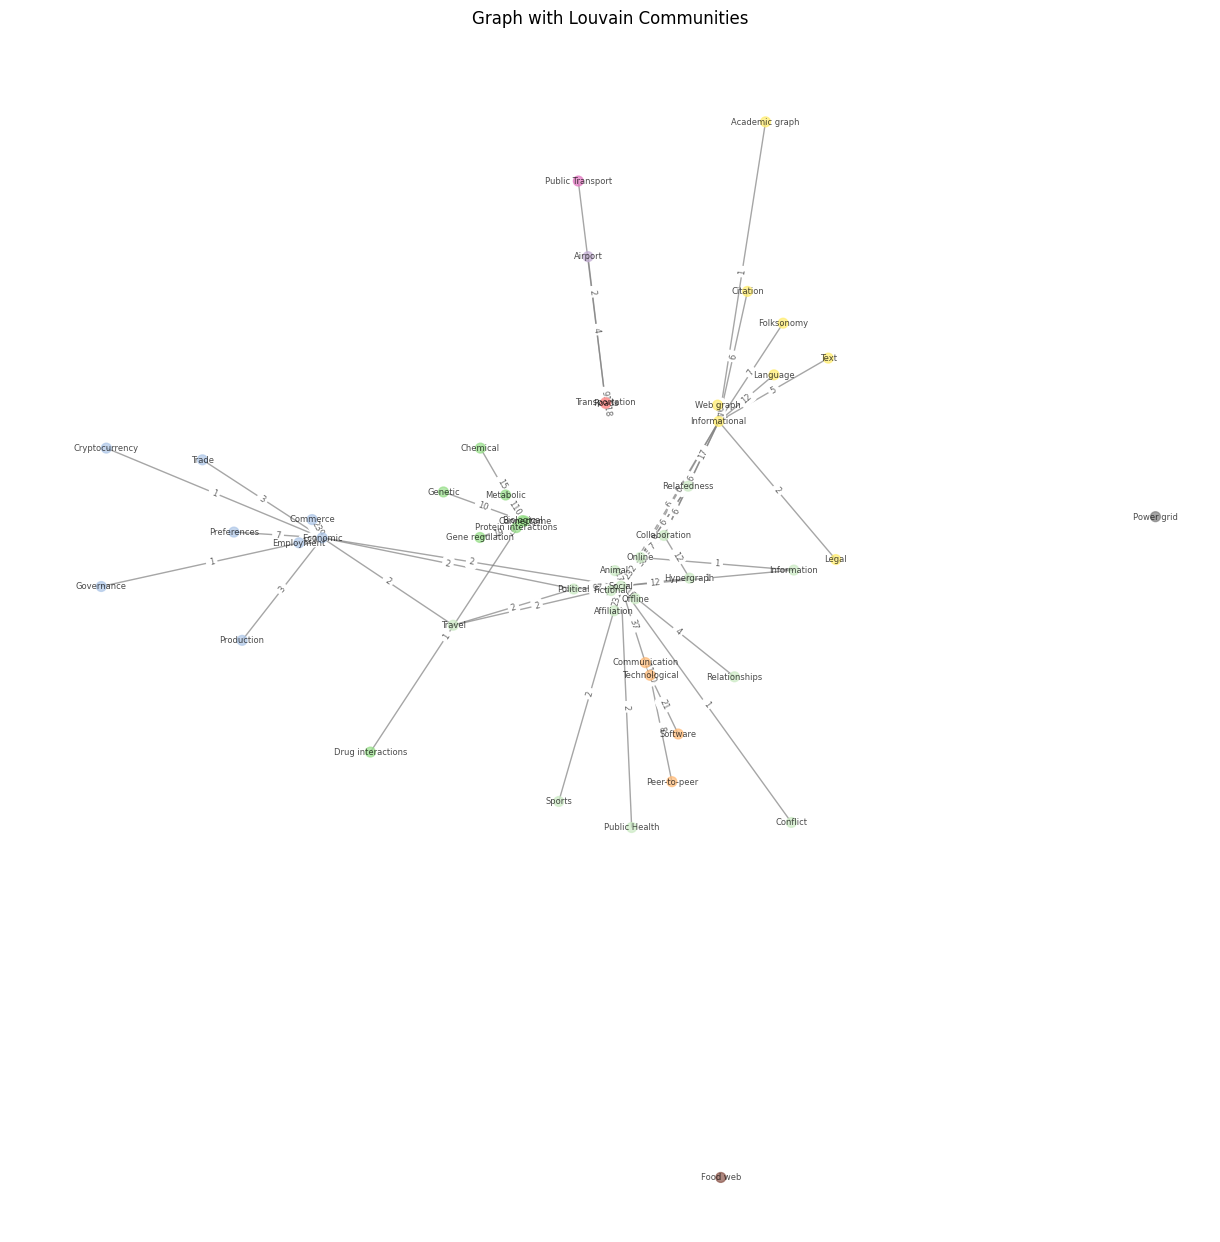

In [230]:
# TODO: Make function generic
def draw_special_mix_communities():
    # TODO: rename it afterwards
    graph = ns_categorical_tags_graph

    node_community_map = {}
    for community_index, community in enumerate(all_graphs_communities_2):
        for node in community:
            node_community_map[node] = community_index
    
    resolution_2_len = len(all_graphs_communities_2)
    resolution_3_len = len(all_graphs_communities_3)
    additional_partition = set()

    higher_resoluion_nodes = set(all_graphs_communities_2[node_community_map['Social']])

    for community_index, community in enumerate(all_graphs_communities_3):
        for node in community:
            if(node in higher_resoluion_nodes):
                new_communitiy_index = community_index + resolution_2_len + resolution_3_len
                additional_partition.add(new_communitiy_index)
                node_community_map[node] = new_communitiy_index

    num_communities = resolution_2_len + resolution_3_len + len(additional_partition)
    colors = np.vstack([plt.cm.tab20(np.linspace(0, 1, num_communities // 2)), plt.cm.Set3(np.linspace(0, 1, num_communities // 2))])
    
    # MARK: Different type for color palettes:
    # np.vstack([plt.cm.tab20b(np.linspace(0, 1, num_communities // 2)), plt.cm.tab20c(np.linspace(0, 1, num_communities // 2))])
    # plt.cm.tab20(range(num_communities)) - limited to 20 colors
    # colors = plt.cm.viridis(np.linspace(0, 1, num_communities)) - gradient
    # colors = plt.cm.rainbow(np.linspace(0, 1, num_communities)) - Large categories with clear distinction
    # plt.cm.hsv(np.linspace(0, 1, num_communities)) - Maximizing color separation

    # Assigning colors to nodes based on their community
    node_colors = [colors[node_community_map[node]] for node in graph.nodes]

    # Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph, k=0.4, scale=4.0)

    nx.draw(
        graph, 
        pos, 
        node_color=node_colors, 
        with_labels=True,
        font_size = 6,
        node_size=50, 
        edge_color='gray', 
        alpha=0.7
    )

    weight_labels = nx.get_edge_attributes(graph,'weight')

    nx.draw_networkx_edge_labels(graph,pos,edge_labels=weight_labels, font_size=6, alpha=0.6)

    plt.title("Graph with Louvain Communities")
    plt.axis('off')
    plt.show()

draw_special_mix_communities()

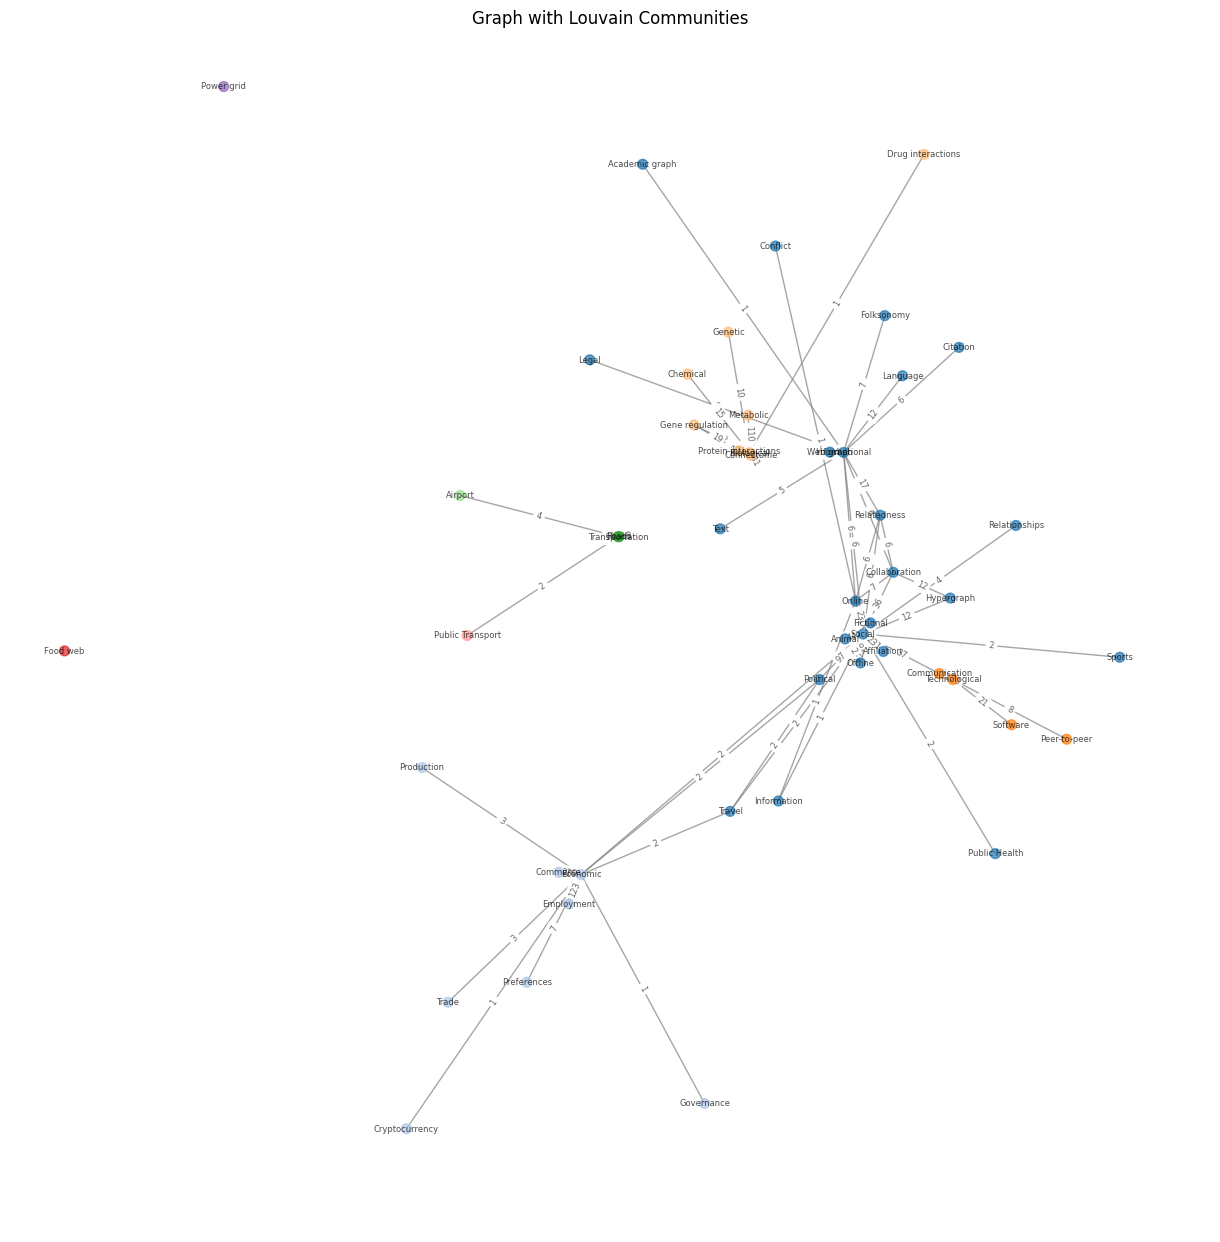

In [ ]:
draw_graph_with_communities(ns_categorical_tags_graph, all_graphs_communities_2)

# Analyze tags in the DataSets of Graphs

In [98]:
ns_dataset = pd.DataFrame(get_ns_dataset())
ns_dataset.head()

,bibtex,citation,description,nets,restricted,tags,title,url,name
0,"[@article{moody_peer_2001,\n doi = {...","[[J. Moody. ""Peer influence groups: Identifyin...",A directed network of friendships obtained thr...,"[comm1, comm2, comm3, comm4, comm5, comm6, com...",True,"[Social, Offline, Weighted]",Adolescent health (ADD HEALTH) (1994),http://moreno.ss.uci.edu/data.html,add_health
1,"[@article{mathews_secondary_1976,\n doi ...","[[M. Vickers and S. Chan, ""Representing Classr...",A small multiplex network of friendships among...,[7th_graders],False,"[Social, Offline, Multilayer, Unweighted, Meta...",Vickers 7th Graders (1981),https://manliodedomenico.com/data.php,7th_graders
2,"[@article{fire_computationally_2013,\n doi ...","[[M. Fire et al. ""Computationally Efficient Li...",Snapshot of the follower relationships among u...,[academia_edu],False,"[Social, Online, Unweighted]",Academica.edu (2011),https://data4goodlab.github.io/MichaelFire/#se...,academia_edu
3,"[@article{newman_finding_2006,\n doi ...","[[M.E.J. Newman, ""Finding community structure ...",A network of word adjacencies of common adject...,[adjnoun],False,"[Informational, Language, Unweighted]",Word adjacencies of David Copperfield,http://www-personal.umich.edu/~mejn/netdata/ad...,adjnoun
4,"[@inproceedings{massa_bowling_2009,\n doi ...","[[P. Massa, M. Salvetti, and D. Tomasoni. ""Bow...",A network of trust relationships among users o...,[advogato],False,"[Social, Online, Weighted]",Advogato trust network (2009),http://konect.cc/networks/advogato,advogato


In [99]:
ns_dataset['tags'] = ns_dataset['tags'].apply(fix_tags)

In [100]:
def filter_categorical_tags_list(tags):
    return [tag for tag in tags if tag not in technical_tags]

In [101]:
ns_dataset_categorical = ns_dataset.copy()
ns_dataset_categorical['tags'] = ns_dataset_categorical['tags'].apply(filter_categorical_tags_list)

In [102]:
dataset_graph = build_tag_graph(ns_dataset_categorical)

In [ ]:
for key, value in edges_to_remove.items():
    dataset_graph.remove_edge(key, value)

In [104]:
# saving dataset graph to graphml
# nx.write_graphml(dataset_graph, "ns_filterd_categorical_edges_removed.graphml")

<Figure size 1000x1000 with 0 Axes>

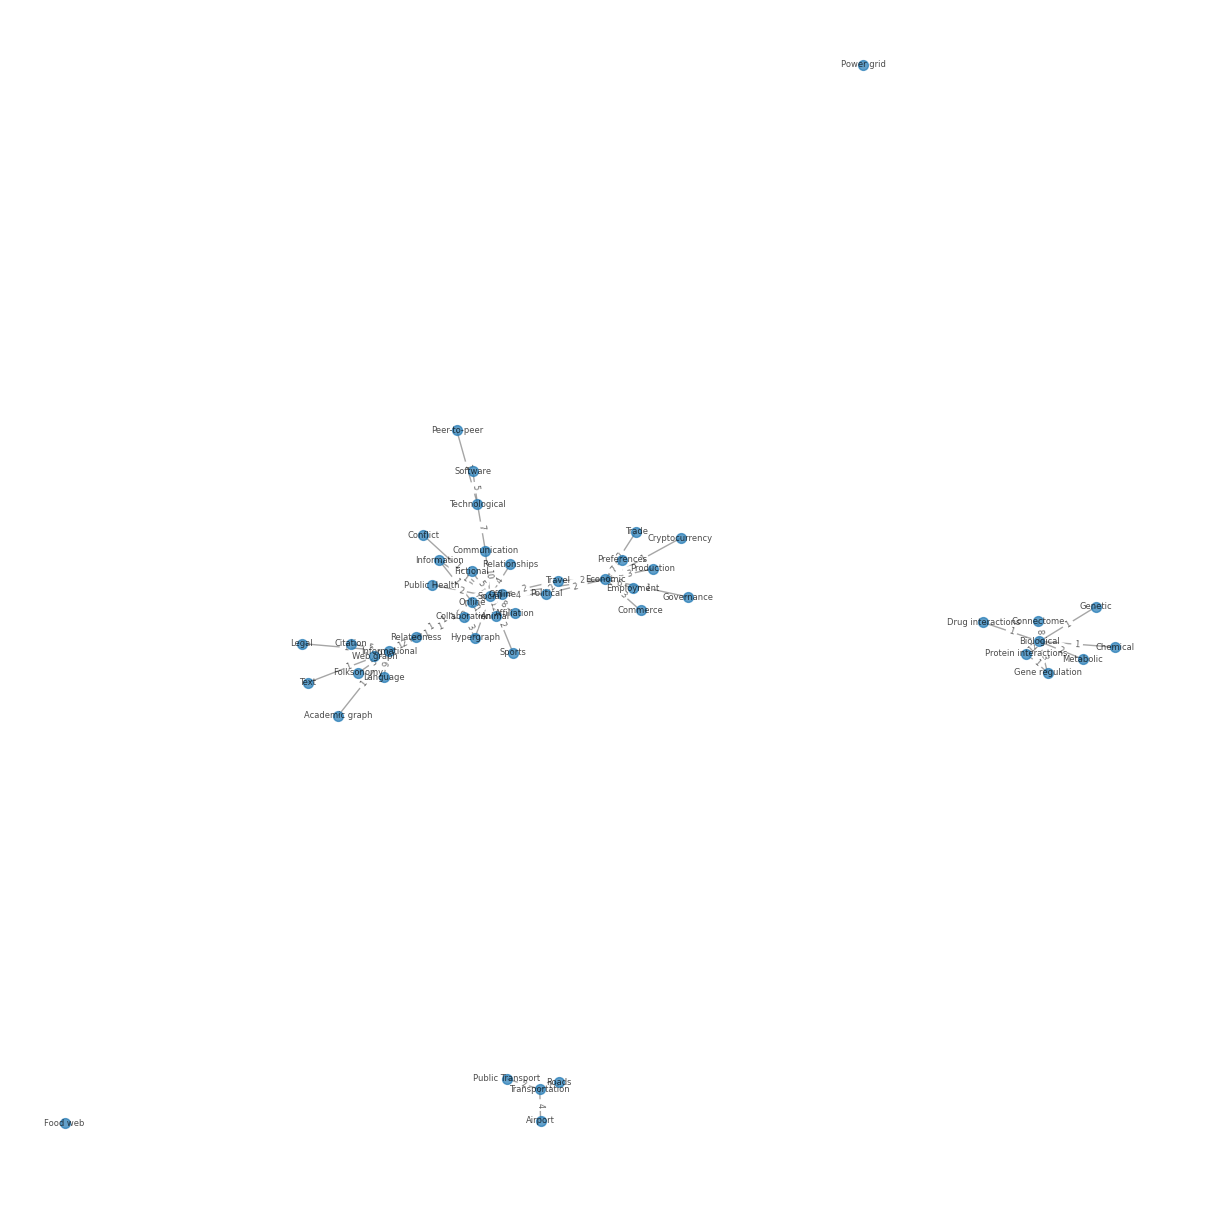

In [105]:
draw_weighted_graph(dataset_graph, layout_function=nx.spring_layout)

In [223]:
dataset_graph_communities = nx.community.louvain_communities(dataset_graph, weight='weight', resolution=1.0)

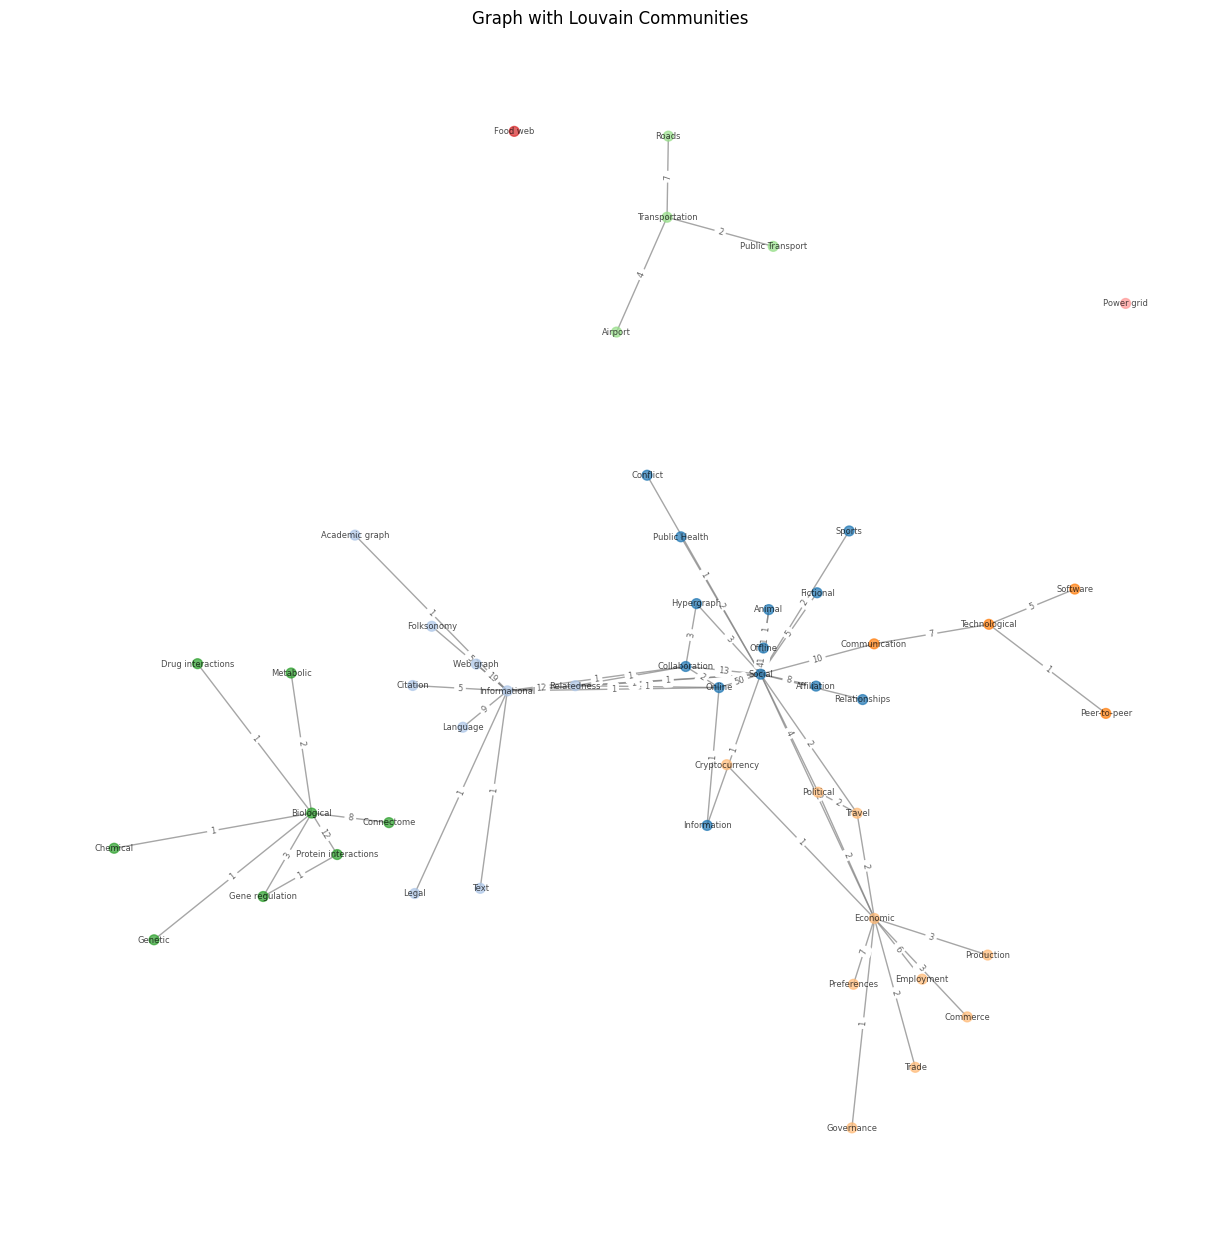

In [236]:
draw_graph_with_communities(dataset_graph, dataset_graph_communities)

In [268]:
dataset_community_map = {
    "Social" : "Social",
    "Academic graph" : "Academic",
    "Technological" : "Technological",
    "Economic" : "Economic",
    "Biological" : "Biological",
    "Transportation" : "Transport",
    "Food web" : "Food web",
    "Power grid" : "Power grid",
}

In [269]:
def get_labeled_df(df, dataset_community_map, communities):
    tag_to_community = {}
    for group_set in communities:
        group_name = None
        for item in group_set:
            if item in dataset_community_map:
                group_name = dataset_community_map[item]
                break

        if group_name is None:
            continue

        for tag in group_set:
            tag_to_community[tag] = group_name

    def get_labels(tags):
        found_labels = set()
        for tag in tags:
            label = tag_to_community.get(tag)
            if label:
                found_labels.add(label)
                
        return found_labels

    df['community_label'] = df['tags'].apply(get_labels)
    return df



In [270]:
ns_dataset =  get_labeled_df(ns_dataset.copy(), dataset_community_map,
              communities=dataset_graph_communities)

In [276]:
len(ns_dataset[ns_dataset['community_label'].apply(lambda x: len(x) > 1)])

24

In [283]:
ns_dataset[ns_dataset['name'].apply(lambda x: x == 'soc_net_comms')]    

,bibtex,citation,description,nets,restricted,tags,title,url,name,community_label
222,"[@misc{jaewon_defining_2012,\n doi =...","[[J. Yang and J. Leskovec. ""Defining and Evalu...","Snapshots of LiveJournal, Friendster, Orkut, a...","[friendster, livejournal, orkut, youtube, dblp...",False,"[Online, Social, Collaboration, Informational,...",Networks with group metadata,https://snap.stanford.edu/data/com-Friendster....,soc_net_comms,"{Social, Academic}"
